In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.8 MB/s eta 0:00:00


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 22.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import functools
import sys

import datasets
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchtext
import tqdm
import transformers

In [4]:

seed = 0

torch.manual_seed(seed)

In [5]:
datasets.list_datasets(with_community_datasets=True, with_details=False)

['acronym_identification',
 'ade_corpus_v2',
 'adversarial_qa',
 'aeslc',
 'afrikaans_ner_corpus',
 'ag_news',
 'ai2_arc',
 'air_dialogue',
 'ajgt_twitter_ar',
 'allegro_reviews',
 'allocine',
 'alt',
 'amazon_polarity',
 'amazon_reviews_multi',
 'amazon_us_reviews',
 'ambig_qa',
 'americas_nli',
 'ami',
 'amttl',
 'anli',
 'app_reviews',
 'aqua_rat',
 'aquamuse',
 'ar_cov19',
 'ar_res_reviews',
 'ar_sarcasm',
 'arabic_billion_words',
 'arabic_pos_dialect',
 'arabic_speech_corpus',
 'arcd',
 'arsentd_lev',
 'art',
 'arxiv_dataset',
 'ascent_kb',
 'aslg_pc12',
 'asnq',
 'asset',
 'assin',
 'assin2',
 'atomic',
 'autshumato',
 'facebook/babi_qa',
 'banking77',
 'bbaw_egyptian',
 'bbc_hindi_nli',
 'bc2gm_corpus',
 'beans',
 'best2009',
 'bianet',
 'bible_para',
 'big_patent',
 'billsum',
 'bing_coronavirus_query_set',
 'biomrc',
 'biosses',
 'blbooks',
 'blbooksgenre',
 'blended_skill_talk',
 'blimp',
 'blog_authorship_corpus',
 'bn_hate_speech',
 'bnl_newspapers',
 'bookcorpus',
 'bookco

In [42]:
train_data, test_data = datasets.load_dataset('emo', split=['train', 'test'])

Generating train split:   0%|          | 0/30160 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5509 [00:00<?, ? examples/s]

Dataset emo downloaded and prepared to /root/.cache/huggingface/datasets/emo/emo2019/1.0.0/3bb182a8ea21ffa4656a89f870d16a7b75abb79f07cf990436beb9320d1d6ddd. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
# Modify the values in a column
def modify_function(example):
    example['sentiment'] = 0 if example['sentiment'] == 0 else 1
    return example

train_data = train_data.map(modify_function)
test_data = test_data.map(modify_function)

Map:   0%|          | 0/1600000 [00:00<?, ? examples/s]

Map:   0%|          | 0/498 [00:00<?, ? examples/s]

In [43]:

transformer_name = 'bert-base-uncased'

tokenizer = transformers.AutoTokenizer.from_pretrained(transformer_name)

In [44]:
tokenizer.tokenize('hello world!')

['hello', 'world', '!']

In [45]:
tokenizer.encode('hello world!')

[101, 7592, 2088, 999, 102]

In [46]:
tokenizer.convert_ids_to_tokens(tokenizer.encode('hello world'))

['[CLS]', 'hello', 'world', '[SEP]']

In [47]:
tokenizer('hello world!')

{'input_ids': [101, 7592, 2088, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1]}

In [48]:
def tokenize_and_numericalize_data(example, tokenizer):
    ids = tokenizer(example['text'], truncation=True)['input_ids']
    return {'ids': ids}

In [53]:
train_data = train_data.map(tokenize_and_numericalize_data, fn_kwargs={'tokenizer': tokenizer})
test_data = test_data.map(tokenize_and_numericalize_data, fn_kwargs={'tokenizer': tokenizer})

Map:   0%|          | 0/30160 [00:00<?, ? examples/s]

Map:   0%|          | 0/5509 [00:00<?, ? examples/s]

In [54]:
train_data['ids'][1]

[101,
 2043,
 2106,
 1045,
 2387,
 2116,
 2335,
 1045,
 2228,
 2053,
 1045,
 2196,
 2387,
 2017,
 102]

In [49]:
train_data[0]

{'text': "don't worry  i'm girl hmm how do i know if you are what's ur name",
 'label': 0}

In [55]:
tokenizer.vocab['!']

999

In [56]:
tokenizer.pad_token

'[PAD]'

In [57]:
tokenizer.pad_token_id

0

In [58]:
tokenizer.vocab[tokenizer.pad_token]

0

In [59]:
pad_index = tokenizer.pad_token_id

In [60]:
test_size = 0.25

train_valid_data = train_data.train_test_split(test_size=test_size)
train_data = train_valid_data['train']
valid_data = train_valid_data['test']

In [61]:
train_data = train_data.with_format(type='torch', columns=['ids', 'label'])
valid_data = valid_data.with_format(type='torch', columns=['ids', 'label'])
test_data = test_data.with_format(type='torch', columns=['ids', 'label'])

In [62]:
transformer = transformers.AutoModel.from_pretrained(transformer_name)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [63]:
transformer.config.hidden_size

768

In [64]:

class Transformer(nn.Module):
    def __init__(self, transformer, output_dim, freeze):
        super().__init__()
        self.transformer = transformer
        hidden_dim = transformer.config.hidden_size
        self.fc = nn.Linear(hidden_dim, output_dim)
        
        if freeze:
            for param in self.transformer.parameters():
                param.requires_grad = False
        
    def forward(self, ids):
        # ids = [batch size, seq len]
        output = self.transformer(ids, output_attentions=True)
        hidden = output.last_hidden_state
        # hidden = [batch size, seq len, hidden dim]
        attention = output.attentions[-1]
        # attention = [batch size, n heads, seq len, seq len]
        cls_hidden = hidden[:,0,:]
        prediction = self.fc(torch.tanh(cls_hidden))
        # prediction = [batch size, output dim]
        return prediction

In [65]:
train_data['label'].unique()

tensor([0, 1, 2, 3])

In [66]:
output_dim = len(train_data['label'].unique())
freeze = False

model = Transformer(transformer, output_dim, freeze)

In [67]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 109,485,316 trainable parameters


In [68]:
lr = 1e-5

optimizer = optim.Adam(model.parameters(), lr=lr)

In [69]:
criterion = nn.CrossEntropyLoss()

In [70]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [71]:
device

device(type='cuda')

In [72]:
model = model.to(device)
criterion = criterion.to(device)

In [73]:
def collate(batch, pad_index):
    batch_ids = [i['ids'] for i in batch]
    batch_ids = nn.utils.rnn.pad_sequence(batch_ids, padding_value=pad_index, batch_first=True)
    batch_label = [i['label'] for i in batch]
    batch_label = torch.stack(batch_label)
    batch = {'ids': batch_ids,
             'label': batch_label}
    return batch

In [74]:
batch_size = 8

collate = functools.partial(collate, pad_index=pad_index)

train_dataloader = torch.utils.data.DataLoader(train_data, 
                                               batch_size=batch_size, 
                                               collate_fn=collate, 
                                               shuffle=True)

valid_dataloader = torch.utils.data.DataLoader(valid_data, batch_size=batch_size, collate_fn=collate)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, collate_fn=collate)

In [75]:

def train(dataloader, model, criterion, optimizer, device):

    model.train()
    epoch_losses = []
    epoch_accs = []

    for batch in tqdm.tqdm(dataloader, desc='training...', file=sys.stdout):
        ids = batch['ids'].to(device)
        label = batch['label'].to(device)
        prediction = model(ids)
        loss = criterion(prediction, label)
        accuracy = get_accuracy(prediction, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy.item())

    return epoch_losses, epoch_accs

In [76]:
import tqdm
import sys

def train(dataloader, model, criterion, optimizer, device):
    model.train()
    epoch_losses = []
    epoch_accs = []

    for batch in tqdm.tqdm(dataloader, desc='Training...', file=sys.stdout):
        ids = batch['ids'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        
        # Forward pass
        predictions = model(ids)
        loss = criterion(predictions, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        accuracy = get_accuracy(predictions, labels)
        
        # Append loss and accuracy to epoch lists
        epoch_losses.append(loss.item())
        epoch_accs.append(accuracy)

    return epoch_losses, epoch_accs


In [80]:
def evaluate(dataloader, model, criterion, device):
    
    model.eval()
    epoch_losses = []
    epoch_accs = []

    with torch.no_grad():
        for batch in tqdm.tqdm(dataloader, desc='evaluating...', file=sys.stdout):
            ids = batch['ids'].to(device)
            label = batch['label'].to(device)
            prediction = model(ids)
            loss = criterion(prediction, label)
            accuracy = get_accuracy(prediction, label)
            epoch_losses.append(loss.item())
            epoch_accs.append(accuracy)

    return epoch_losses, epoch_accs

In [81]:
def get_accuracy(prediction, label):
    batch_size, _ = prediction.shape
    predicted_classes = prediction.argmax(dim=-1)
    #correct_predictions = predicted_classes.eq(label).sum()
    correct_predictions = (predicted_classes == label).sum().item()
    accuracy = correct_predictions / batch_size
    return accuracy

evaluating...: 100%|██████████| 943/943 [00:17<00:00, 53.06it/s]
Epoch: 1/5
Train Loss: 0.240, Train Accuracy: 0.918
Validation Loss: 0.293, Validation Accuracy: 0.905

evaluating...: 100%|██████████| 943/943 [00:18<00:00, 52.18it/s]
Epoch: 2/5
Train Loss: 0.164, Train Accuracy: 0.947
Validation Loss: 0.344, Validation Accuracy: 0.897

evaluating...: 100%|██████████| 943/943 [00:18<00:00, 52.24it/s]
Epoch: 3/5
Train Loss: 0.109, Train Accuracy: 0.966
Validation Loss: 0.362, Validation Accuracy: 0.899

evaluating...: 100%|██████████| 943/943 [00:17<00:00, 52.64it/s]
Epoch: 4/5
Train Loss: 0.082, Train Accuracy: 0.974
Validation Loss: 0.396, Validation Accuracy: 0.896

evaluating...: 100%|██████████| 943/943 [00:17<00:00, 52.87it/s]
Epoch: 5/5
Train Loss: 0.057, Train Accuracy: 0.982
Validation Loss: 0.461, Validation Accuracy: 0.892



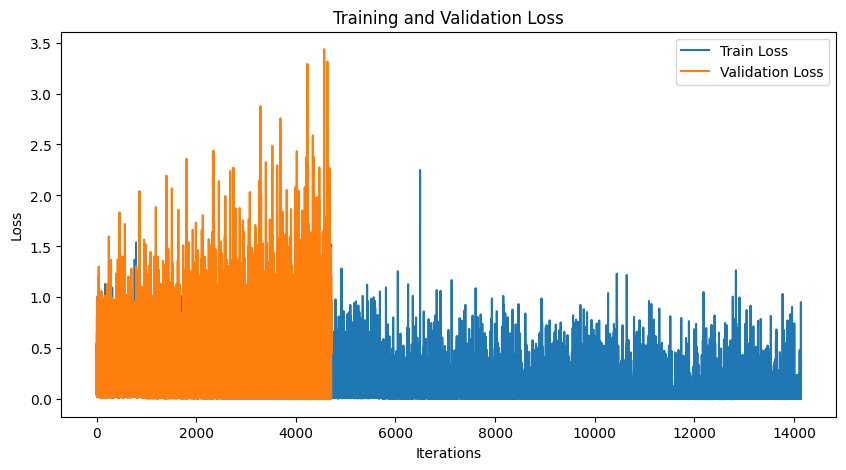

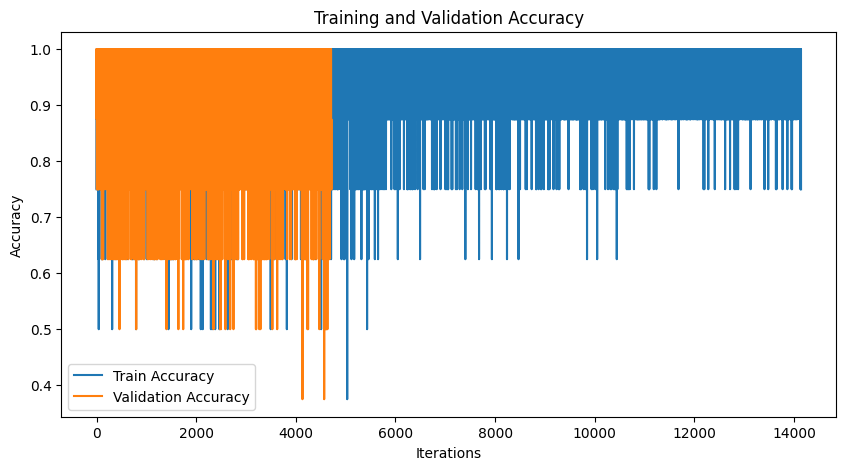

In [83]:
n_epochs = 5
best_valid_loss = float('inf')

train_losses = []
train_accs = []
valid_losses = []
valid_accs = []

for epoch in range(n_epochs):

    train_loss, train_acc = train(train_dataloader, model, criterion, optimizer, device)
    valid_loss, valid_acc = evaluate(valid_dataloader, model, criterion, device)

    train_losses.extend(train_loss)
    train_accs.extend(train_acc)
    valid_losses.extend(valid_loss)
    valid_accs.extend(valid_acc)
    
    epoch_train_loss = np.mean(train_loss)
    epoch_train_acc = np.mean(train_acc)
    epoch_valid_loss = np.mean(valid_loss)
    epoch_valid_acc = np.mean(valid_acc)
    
    if epoch_valid_loss < best_valid_loss:
        best_valid_loss = epoch_valid_loss
        torch.save(model.state_dict(), 'transformer.pt')
    
    print(f'Epoch: {epoch+1}/{n_epochs}')
    print(f'Train Loss: {epoch_train_loss:.3f}, Train Accuracy: {epoch_train_acc:.3f}')
    print(f'Validation Loss: {epoch_valid_loss:.3f}, Validation Accuracy: {epoch_valid_acc:.3f}')
    print()

# Plotting the training and validation losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plotting the training and validation accuracies
plt.figure(figsize=(10, 5))
plt.plot(train_accs, label='Train Accuracy')
plt.plot(valid_accs, label='Validation Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [85]:
def predict_sentiment(text, model, tokenizer, device):
    ids = tokenizer(text)['input_ids']
    tensor = torch.LongTensor(ids).unsqueeze(dim=0).to(device)
    prediction = model(tensor).squeeze(dim=0)
    probability = torch.softmax(prediction, dim=-1)
    predicted_class = prediction.argmax(dim=-1).item()
    predicted_probability = probability[predicted_class].item()
    return predicted_class, predicted_probability

In [86]:
text = "This film is not great, it's terrible!"

predict_sentiment(text, model, tokenizer, device)

(2, 0.8760778903961182)

In [87]:
text = "This film is terrible!"

predict_sentiment(text, model, tokenizer, device)

(2, 0.7474605441093445)

In [88]:
text = "This film is not terrible, it is good!"

predict_sentiment(text, model, tokenizer, device)

(0, 0.7131956815719604)